#  General PipeLine for A Algorithm in MachineLearning
the complete structure of a machine‑learning pipeline, from installing dependencies to visualizing outputs.

# 1. Installing libraries
Install all required dependencies (run **once**).

In [34]:
# Install core libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn
# !pip install seaborn

# 2. Importing libraries
Importing All librairies that we need 

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer


# 3 Dataset

## 3.1 Importing the dataset Housing
Load your dataset (CSV, Parquet, SQL, etc.).



In [2]:
# Assign the path to the datasets directory and the data file
datasets_path = '../datasets/'
housing_data_file = 'train.csv'
# Load the dataset
df_train = pd.read_csv(datasets_path+ housing_data_file)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Data exploration and cleaning(Housing)
Inspect statistical summaries and handle missing values or outliers.

In [3]:
# Quick data overview
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3.3 Check for Missing VALUES
Count how many Missing Values (null) Exist in each column

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4 Visualisation Of Data

## 4.1 Univariate Analysis

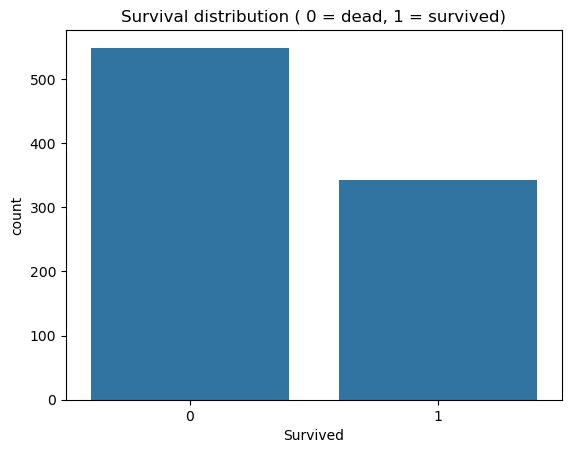

In [8]:
sns.countplot(x='Survived', data=df_train)
plt.title('Survival distribution ( 0 = dead, 1 = survived)')
plt.show()

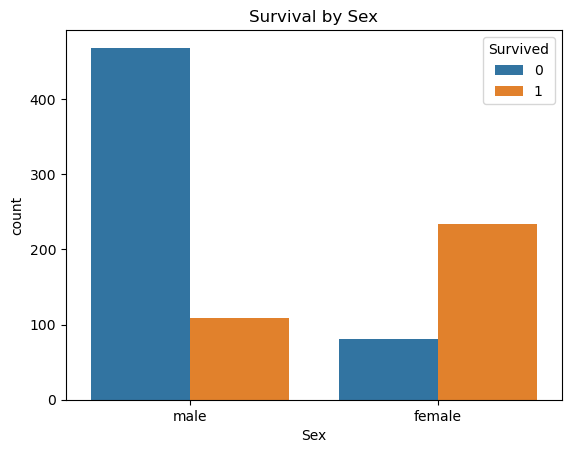

In [17]:

# Plot survival by sex
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Survival by Sex')
plt.show()

## 4.2 Bivariate - Multivariate Analysis 


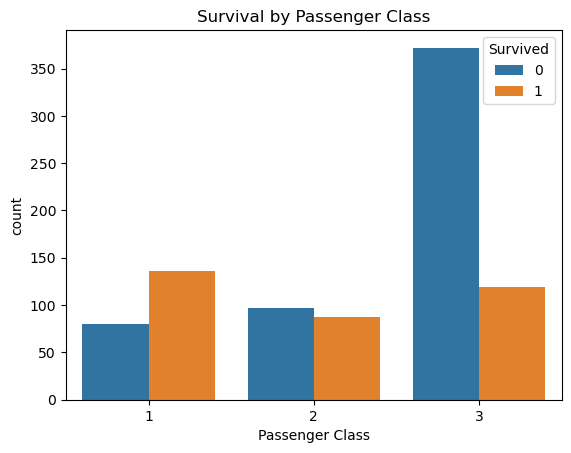

In [24]:
# Plot survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.show()

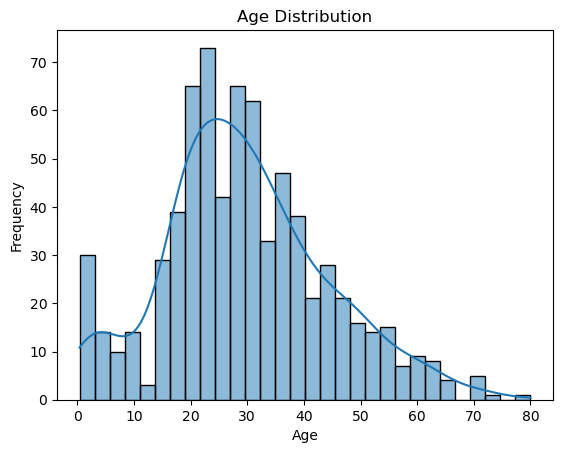

In [25]:
# Age distribution
sns.histplot(df_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

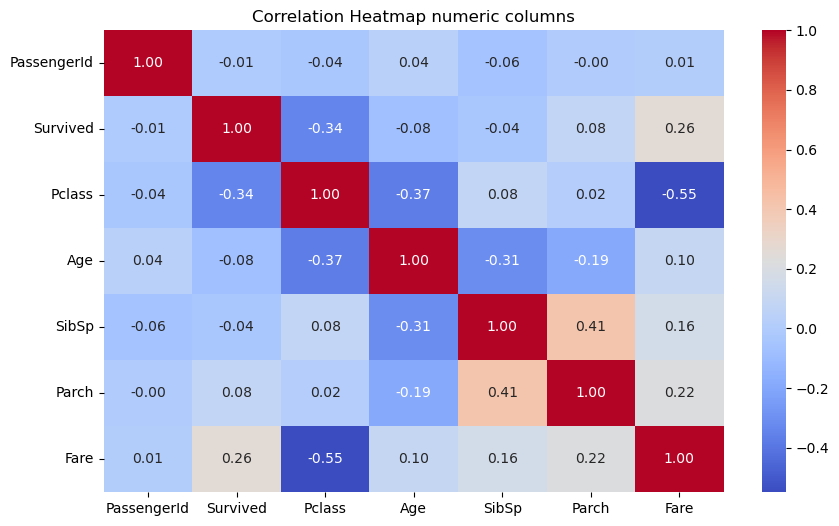

In [34]:
# Correlation heatmap
# create a figure with an appropriate size (eg, width=10, height=6)

plt.figure(figsize=(10, 6))
# Plot the correlation heatmap
# make sure to include only numeric columns
numeric_cols = df_train.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap numeric columns')
plt.show()

# 5 Preprocessing The DATA


## Printing all the data 

In [38]:
# Print selected columns from df_train
print(df_train[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].head())


# select the appropriate features for X and define the tarfget variable y. 
# make sure to exclude the PassengerId, Name, Ticket, and Cabin columns as they are not useful for prediction
X = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
y = df_train['Survived']

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [39]:
# Step 2 : 
# manually define the list of categorical and numerical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Step 3 : 
# Create the pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
#Step 4 :
# Create the pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Step 5 :
# Combine the numerical and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 6 :fit and transform the data X using the combined preprocessor
X_proprocessed = preprocessor.fit_transform(X)



#  6  Split the data 

##  6.1 Split the dataset into training part and testing part

In [45]:
#USE THE PROCESSED FEATURES (x_PREPROCESSED0 AND THE TARGET (Y) .
#set the test size to 20% and the random state to 42 for reproducibility
# store the output in X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_proprocessed, y, test_size=0.2, random_state=42)

##  6.2  Display Dimension to verify the split 

In [47]:
#print the shape of X_train and X_test to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (712, 12)
X_test shape: (179, 12)


##  6.3  Display Dimension to verify the split 

In [49]:
#Calculate the total number of samples as well as the number of samples in the training and test sets
total_samples = X.shape[0]
X_train_rows = X_train.shape[0]
X_test_rows = X_test.shape[0]

Text(0.5, 1.0, 'Distribution of Training and Test Sets')

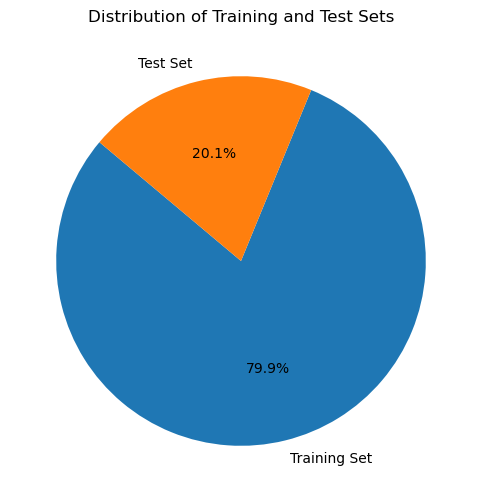

In [51]:
# create a percentage of the training and test sets
train_pct = (X_train_rows / total_samples) * 100
test_pct = (X_test_rows / total_samples) * 100
labels= ['Training Set', 'Test Set']
sizes = [train_pct, test_pct]
# Plot the distribution of training and test sets
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Training and Test Sets')